Algorithm 2: Logistic Regression

In [3]:
%pip install pandas matplotlib scikit-learn seaborn numpy

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("cleaned_early_pd_dataset.csv")
print(df.head())
print(df.info())

   patient_id  visit_month visit_id   O00391    O00533   O00584   O14498  \
0          55            0     55_0  11254.3  732430.0  39585.8  41526.9   
1          55            6     55_6  13163.6  630465.0  35220.8  41295.0   
2          55           12    55_12  15257.6  815083.0  41650.9  39763.3   
3          55           36    55_36  13530.8  753832.0  43048.9  43503.6   
4         942            6    942_6  11218.7  399518.0  20581.0  31290.9   

     O14773   O14791    O15240  ...  Q9HDC9_was_imputed  Q9NQ79_was_imputed  \
0  31238.00  4202.71  177775.0  ...                   0                   0   
1  26219.90  4416.42  165638.0  ...                   0                   0   
2  30703.60  4343.60  151073.0  ...                   0                   0   
3  33577.60  5367.06  101056.0  ...                   0                   0   
4   6173.58  2564.37  160526.0  ...                   0                   0   

   Q9NYU2_was_imputed  Q9UBR2_was_imputed  Q9UBX5_was_imputed  \
0  

Set the training and testing dataset

In [6]:
X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training the model

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

Find the predicted value and probability

In [8]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

Plot the confusion matrix in heatmap

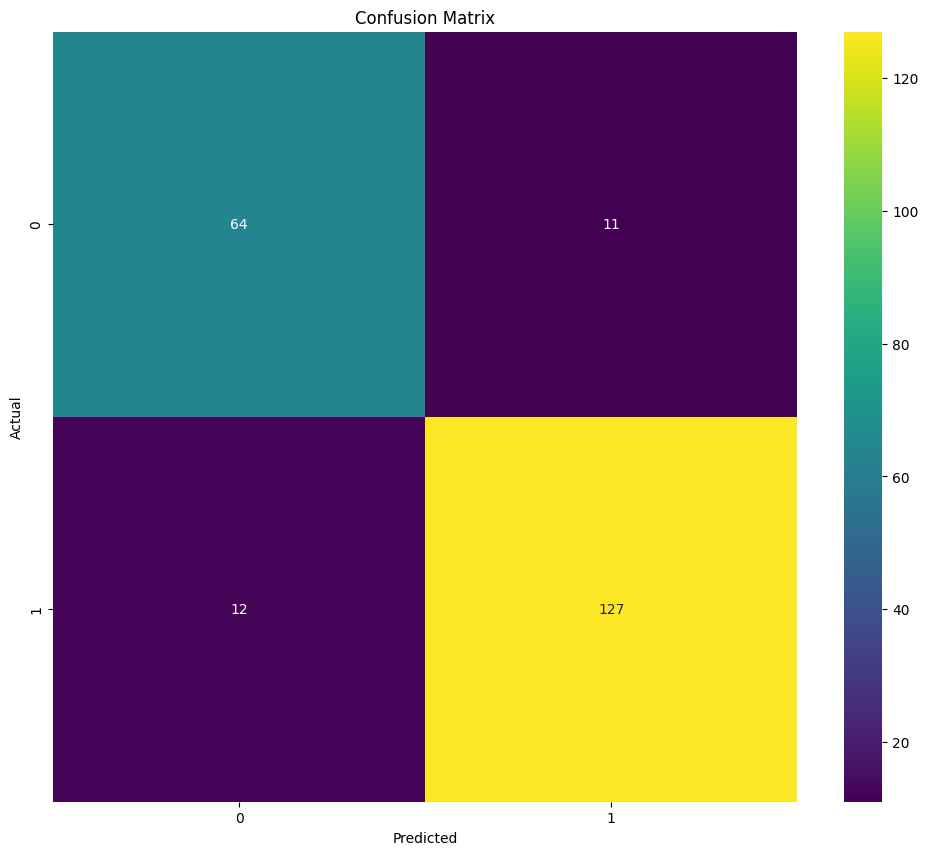

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d',cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Print the classification report

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        75
           1       0.92      0.91      0.92       139

    accuracy                           0.89       214
   macro avg       0.88      0.88      0.88       214
weighted avg       0.89      0.89      0.89       214



Plot the roc curve

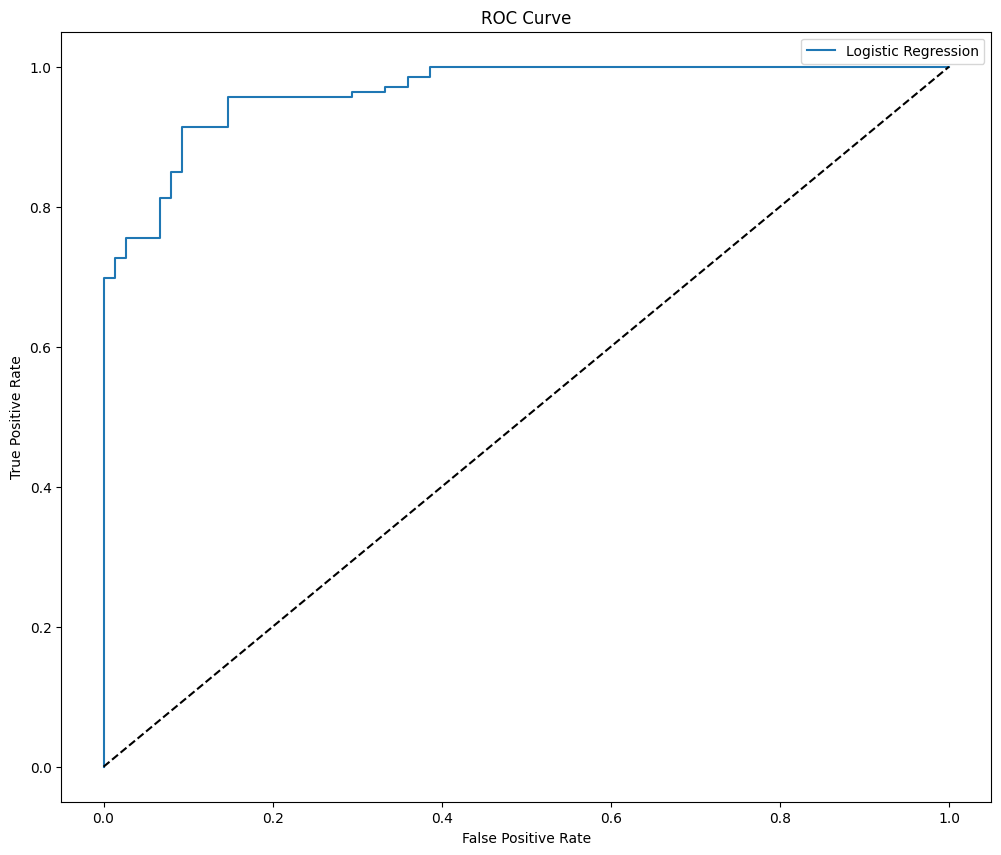

ROC-AUC Score:0.96


In [17]:
false_positive,true_positive,_ =roc_curve(y_test, y_prob)
plt.figure(figsize=(12,10))
plt.plot(false_positive,true_positive, label='Logistic Regression')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print(f"ROC-AUC Score:{roc_auc_score(y_test, y_prob):.2f}")

In [15]:
importance = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(importance)
})
feature_importance=feature_importance.sort_values(by='Importance',ascending=False)
print(feature_importance)

                Feature  Importance
231             updrs_3    4.031471
230             updrs_2    2.173151
232             updrs_4    1.306710
174              P61769    0.727203
221              Q9NYU2    0.590462
..                  ...         ...
333  P07602_was_imputed    0.000000
256  P01009_was_imputed    0.000000
255  P01008_was_imputed    0.000000
254  P00751_was_imputed    0.000000
278  P01876_was_imputed    0.000000

[459 rows x 2 columns]
